# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

train_data_dir = r"C:\Users\HP\Downloads\DiseaseDetection\Lung Disease Dataset\train"
validation_data_dir = r"C:\Users\HP\Downloads\DiseaseDetection\Lung Disease Dataset\val"
test_data_dir = r"C:\Users\HP\Downloads\DiseaseDetection\Lung Disease Dataset\test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 6054 images belonging to 5 classes.


### Preprocessing the Test set and Validation Set

In [3]:
validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow validation images in batches using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
model = Sequential()

### Step 1 - Convolution

In [5]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

### Step 2 - Pooling

In [6]:
model.add(MaxPooling2D(pool_size=(2, 2)))

### Adding more convolutional layers

In [7]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Step 3 - Flattening

In [8]:
model.add(Flatten())

### Step 4 - Full Connection

In [9]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

### Step 5 - Output Layer

In [10]:
model.add(Dense(5, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/20
189/189 [==============================] - 306s 2s/step - loss: 0.8091 - accuracy: 0.6757 - val_loss: 0.6065 - val_accuracy: 0.7530
Epoch 2/20
189/189 [==============================] - 310s 2s/step - loss: 0.7066 - accuracy: 0.7132 - val_loss: 0.5712 - val_accuracy: 0.7748
Epoch 3/20
189/189 [==============================] - 318s 2s/step - loss: 0.6480 - accuracy: 0.7385 - val_loss: 0.5177 - val_accuracy: 0.7902
Epoch 4/20
189/189 [==============================] - 314s 2s/step - loss: 0.6656 - accuracy: 0.7323 - val_loss: 0.5149 - val_accuracy: 0.7842
Epoch 5/20
189/189 [==============================] - 319s 2s/step - loss: 0.5863 - accuracy: 0.7579 - val_loss: 0.5115 - val_accuracy: 0.7946
Epoch 6/20
189/189 [==============================] - 306s 2s/step - loss: 0.5797 - accuracy: 0.7605 - val_loss: 0.4843 - val_accuracy: 0.8070
Epoch 7/20
189/189 [==============================] - 290s 2s/step - loss: 0.5467 - accuracy: 0.7767 - val_loss: 0.5073 - val_accuracy: 0.7857

In [14]:
model.save(r'C:\Users\HP\Downloads\DiseaseDetection\lung_disease_model.keras')

### Evaluating the Model

In [15]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

63/63 [==============================] - 47s 740ms/step - loss: 0.4072 - accuracy: 0.8348
Test Accuracy: 83.48%


### Visualization of result

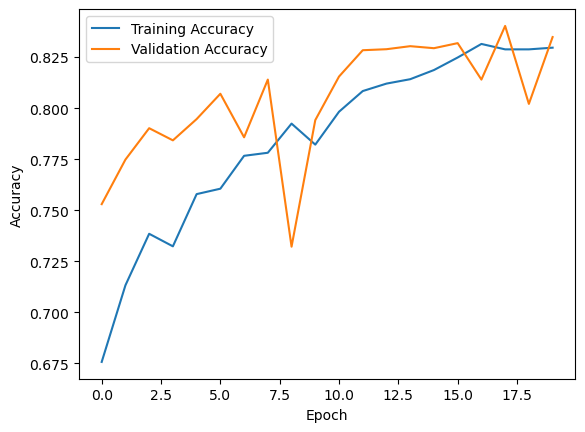

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
print("Class indices:", train_generator.class_indices)

Class indices: {'Bacterial Pneumonia': 0, 'Corona Virus Disease': 1, 'Normal': 2, 'Tuberculosis': 3, 'Viral Pneumonia': 4}


## Part 4 - Making a single prediction

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model = tf.keras.models.load_model(r"C:\Users\HP\Downloads\DiseaseDetection\lung_disease_model.keras")

# Load a single test image for prediction
single_image_path = r"C:\Users\HP\Downloads\DiseaseDetection\Lung Disease Dataset\test\Corona Virus Disease\COVID19(275).jpg"  # Replace with the path to your single image
single_img = image.load_img(single_image_path, target_size=(150, 150))
single_img_array = image.img_to_array(single_img)
single_img_array = np.expand_dims(single_img_array, axis=0)
single_img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make the prediction
prediction = model.predict(single_img_array)

# Get the predicted class and confidence percentage
predicted_class = np.argmax(prediction)
confidence_percentage = np.max(prediction) * 100

# Map the class index to the actual label
class_labels ={0:'Bacterial Pneumonia',1:'Corona Virus Disease',2:'Normal',3:'Tuberculosis',4:'Viral Pneumonia'}
predicted_label = class_labels[predicted_class]

print(f"The predicted category for the single image is: {predicted_label}")
print(f"Confidence Percentage: {confidence_percentage:.2f}%")

1/1 [==============================] - 0s 373ms/step
The predicted category for the single image is: Corona Virus Disease
Confidence Percentage: 99.92%
